En la población formada por las empresas de la industria química, sea rd gastos anuales en
investigación y desarrollo y sales ventas anuales (ambos en millones de dólares).

i) Dé un modelo (no una ecuación estimada) que implique una elasticidad constante entre
rd y sales. ¿Qué parámetro es la elasticidad?

In [1]:
# Importamos las librerias
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [2]:
# Respuesta 1
respuesta = '''
Un modelo de elasticidad constante se define como un modelo log-log.
Esto significa que el modelo es una ecuación con ambos lados logarítmicos.
Estos modelos se interpretan como cambios porcentuales de los valores de las variables.
Un cambio de un 1% en la variable X se produce un cambio de X% en la variable Y.
Por tanto el modelo puede definirse como:
                    
                    log(rd) = bo + b1 * log(sales)  

cuya elasticidad es el coeficiente b1.

'''
print(respuesta)



Un modelo de elasticidad constante se define como un modelo log-log.
Esto significa que el modelo es una ecuación con ambos lados logarítmicos.
Estos modelos se interpretan como cambios porcentuales de los valores de las variables.
Un cambio de un 1% en la variable X se produce un cambio de X% en la variable Y.
Por tanto el modelo puede definirse como:
                    
                    log(rd) = bo + b1 * log(sales)  

cuya elasticidad es el coeficiente b1.




ii) Ahora, estime el modelo usando la base de datos RDCHEM.RAW. Escriba la ecuación
estimada en su forma usual. ¿Cuál es la elasticidad estimada para rd respecto a sales?
Explique qué significa esta elasticidad.


In [3]:
# Respuesta 2
# Importamos el conjunto de datos
datos = pd.read_csv('C:/Users/crisd/OneDrive/Escritorio/libros/Datasets/RDCHEM.csv', 
usecols=['rd', 'sales'])
datos.head()

,rd,sales
0,430.600006,4570.200195
1,59.000000,2830.000000
2,23.500000,596.799988
3,3.500000,133.600006
4,1.700000,42.000000


In [4]:
# Transformamos los datos y los separamos
X = np.log(datos['sales'].copy())
y = np.log(datos['rd'].copy())

# Se agregan las variables constantes
X_sm = sm.add_constant(X)

# Se crea el modelo y se entrena
model = sm.OLS(y, X_sm).fit()

# Se imprime el resumen del modelo
model.summary(title='Modelo de Regresion Log-Log')

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Modelo de Regresion Log-Log                          
==============================================================================
Dep. Variable:                     rd   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 02 May 2022   Prob (F-statistic):           3.20e-17
Time:                        22:50:05   Log-Likelihood:                -24.021
No. Observations:                  32   AIC:                             52.04
Df Residuals:                      30   BIC:                             54.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1047      0.453     -9.066      0.000      -5.029      -3.180
sales          1.0757      0.062     17.399      0.000       0.949       1.202
==============================================================================
Omnibus:                        1.407   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.025
Skew:                           0.139   Prob(JB):                        0.599
Kurtosis:                       2.168   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
print('La elasticidad del modelo es de : %.2f%%' %model.params[1].round(2))

respuesta = '''
Esto significa que si las ventas aumentan en un 1% el gasto en I+D aumenta en un 1.8%.
'''
print(respuesta)


La elasticidad del modelo es de : 1.08%

Esto significa que si las ventas aumentan en un 1% el gasto en I+D aumenta en un 1.8%.



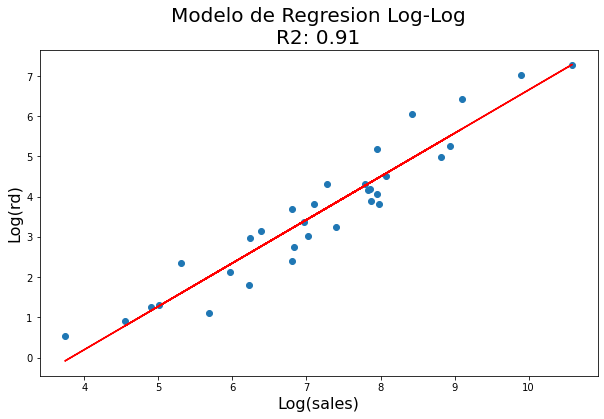

In [6]:
# Como ultimo paso, se grafica el modelo
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X, model.predict(X_sm), color='red')
plt.title(
    f'Modelo de Regresion Log-Log\nR2: {r2_score(y, model.predict(X_sm)):.2f}', fontsize=20)
plt.xlabel('Log(sales)', fontsize=16)
plt.ylabel('Log(rd)', fontsize=16)
plt.show()
